# 🎙️ Mini Voice Assistant – FPGA Prototype

This notebook is for prototyping a tiny voice recognition model for the Alchitry Cu FPGA board (Lattice iCE40 HX).

We'll:
- Record voice samples using the laptop mic
- Extract MFCC features from audio
- Train a simple TensorFlow model to detect keywords
- Export the model for embedded deployment


In [2]:
import numpy as np
import sounddevice as sd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import time


In [3]:
import soundfile as sf
import time

fs = 16000  # Sample rate
duration = 1  # seconds

print("🎙️ Get ready to say 'yes'...")
for i in range(3, 0, -1):
    print(f"{i}...")
    time.sleep(1)

print("🎤 Recording now!")
audio = sd.rec(int(fs * duration), samplerate=fs, channels=1, dtype='float32')
sd.wait()

# Save the audio
os.makedirs("recordings", exist_ok=True)
out_path = "recordings/yes.wav"
sf.write(out_path, audio.squeeze(), fs)
print(f"✅ Saved to {out_path}")

🎙️ Get ready to say 'yes'...
3...
2...
1...
🎤 Recording now!
✅ Saved to recordings/yes.wav


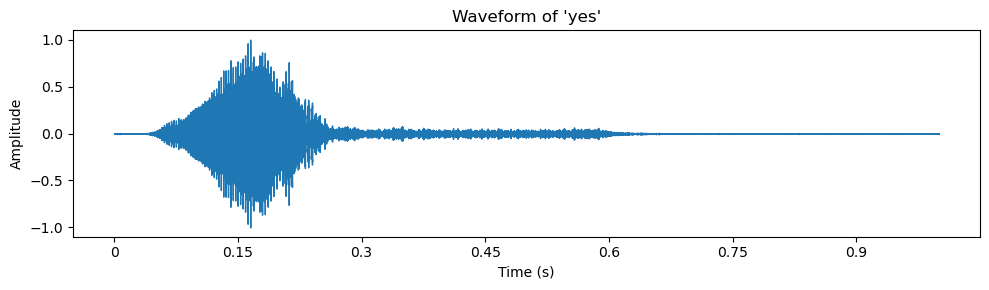

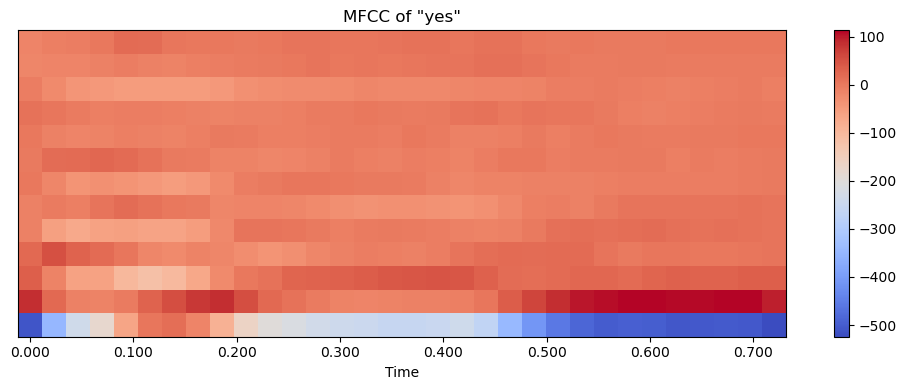

In [4]:
# Load the audio
y, sr = librosa.load("recordings/yes.wav", sr=16000)

# Plot waveform
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of 'yes'")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC of "yes"')
plt.tight_layout()
plt.show()
